<h1 style="color:#C4341A;"> Chargez les données dans votre Notebook 🌟</h1>


<p style="color:#67B743; font-weight:bold;">Importation de panda</p>

In [62]:
import pandas as pd 
import matplotlib.pyplot as plt

<h2 style="color:#C4341A;">Importation EdStatsCountry-Series.csv </h2>

In [50]:
data_edSCS_csv = pd.read_csv('EdStatsCountry-Series.csv')

data_edSCS_csv.head() 

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [51]:
data_edSCS_csv.shape

(613, 4)

nous avons 613 transactions, avec 4 variables différentes :

- CountryCode : Code ISO à trois lettres représentant un pays ou une région (par exemple, ABW pour Aruba, AFG pour l'Afghanistan).
- SeriesCode : Code unique identifiant un indicateur spécifique.
Exemple :
SP.POP.TOTL : Total de la population.
SP.POP.GROW : Taux de croissance de la population.
NY.GDP.PCAP.PP.CD : PIB par habitant en parité de pouvoir d'achat (PPA).
- DESCRIPTION : Description ou notes expliquant la source ou la méthodologie utilisée pour calculer cet indicateur.
- Unnamed:3 : Colonne inutile

### Suppression des colonnes inutiles

In [52]:
#Colonne inutile
data_edSCS_csv = data_edSCS_csv.drop(columns=['Unnamed: 3'])

### 1. Erreurs de type

Regarder si toutes les colonnes sont correct par rapport au type qu'elle comporte :

In [53]:
data_edSCS_csv.dtypes

CountryCode    object
SeriesCode     object
DESCRIPTION    object
dtype: object

Toutes les cathégories sont de type objet ce qui est correct

### 2. Valeur manquante

In [54]:
data_edSCS_csv.isnull().sum()

CountryCode    0
SeriesCode     0
DESCRIPTION    0
dtype: int64

Aucune erreur manquante par ce fait aucune action supplémentaire

#### 2.1 Calculez la proportion de valeurs manquantes par colonne

In [55]:
#Pourcentage de valeurs manquantes = (Nombre de valeurs manquantes / Nombre total de valeurs) * 100
missing_values = data_edSCS_csv.isnull().sum()
total_values = data_edSCS_csv.count() + missing_values
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)     

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
dtype: float64


Calcule de proportion des valeur manquante pour les avoir en pourcentage, ici 0% de valeur menquante pour l'intégralité des colonnes 

### 3. Doublon

On regarde si toutes les abréviations ne sont pas apparues en doublons. Nous allons regarder les abréviations en même temps que le SeriesCode car ce duo ne peux pas avoir de doublon il doit etre authentique 

In [56]:
data_edSCS_csv.loc[data_edSCS_csv[['CountryCode', 'SeriesCode']].duplicated(keep=False),:]

,CountryCode,SeriesCode,DESCRIPTION


>Aucun doublons n'est détecté 

drop_duplicate nous permet de supprimer tous les doublons est de garder juste un parmis tous les doublons identique. Ici rien ne se passera car nous n'avons pas de doublons

In [57]:
data_edSCS_csv.drop_duplicates(subset=['CountryCode', 'SeriesCode'], inplace=True, ignore_index=True)

### 4. Calculez les statistiques descriptives

Pour calculer les statistiques descriptives il faut utilise le describe() très utile pour faire une premiere prévisualisation. Mais dansnotre dataframe nous n'avons pas de donnée numérique, nous avons que des objets. Cela nest pas très utile pour ce DataFrame  

### 5. Calculez le nombre d'occurences de chaque colonne

In [59]:
columns = [
    'CountryCode',
    'SeriesCode'
]

for col in columns:
    print(f"{col} :")
    print(data_edSCS_csv[col].value_counts())
    print() 

CountryCode :
CountryCode
GEO    18
MDA    18
CYP    12
SRB    12
MUS    12
       ..
WSM     2
YEM     2
ZAF     2
ZMB     2
ZWE     2
Name: count, Length: 211, dtype: int64

SeriesCode :
SeriesCode
SP.POP.TOTL          211
SP.POP.GROW          211
NY.GDP.PCAP.PP.CD     19
NY.GNP.PCAP.PP.CD     19
NY.GDP.PCAP.PP.KD     19
NY.GNP.MKTP.PP.CD     14
NY.GDP.MKTP.PP.KD     14
NY.GDP.MKTP.PP.CD     14
SP.POP.1564.TO.ZS     13
SP.POP.TOTL.MA.ZS     13
SP.POP.TOTL.FE.ZS     13
SP.POP.0014.TO.ZS     13
NY.GNP.PCAP.CD         6
NY.GDP.PCAP.CD         5
NY.GDP.PCAP.KD         5
SP.POP.1564.MA.IN      4
SP.POP.0014.TO         4
SP.POP.1564.TO         4
SP.POP.1564.FE.IN      4
SP.POP.0014.MA.IN      4
SP.POP.0014.FE.IN      4
Name: count, dtype: int64



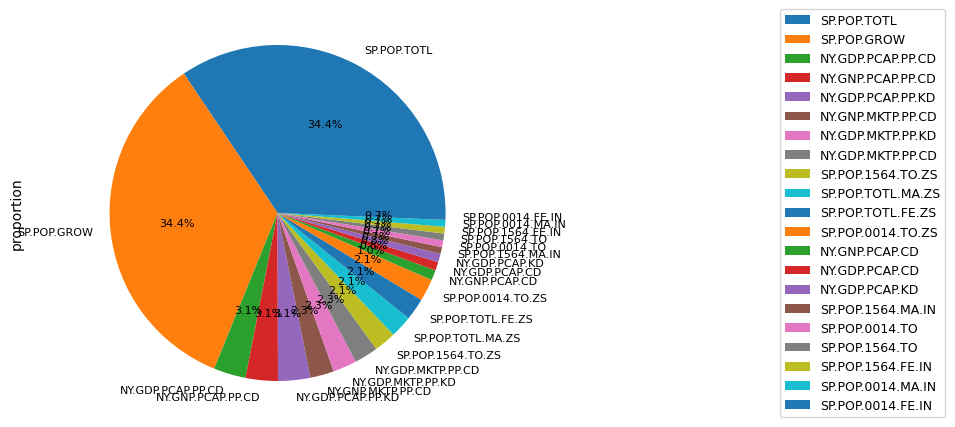

In [75]:
# Diagramme en secteurs
ax = data_edSCS_csv["SeriesCode"].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%', 
    fontsize=8         
)

# Ajouter une légende sur le côté
ax.legend(
    labels=data_edSCS_csv["SeriesCode"].value_counts(normalize=True).index, 
    loc='center left',    
    bbox_to_anchor=(1.5, 0.5),  
    fontsize=9            
)

# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() 


### 6. Création d'une liste 

In [76]:
#Netoyage Des pays
valid_countries = data_edSCS_csv['CountryCode'].tolist()

Création d'une liste des pays valide afin de pouvoir retiré les lignes contenant de faux pays

<hr style="border: 1px solid #C4341A;">

<h2 style="color:#C4341A;"> EdStatsCountry.csv </h2>

<p style="color:#67B743; font-weight:bold;">Importation EdStatsCountry</p>

<blockquote style="background-color:#f9f9f9; color:#333; border-left:5px solid #007BFF; padding:10px;">
Chaque ligne correspond à un pays, données sur le nom et l'acronyme du pays, ses revenus, ainsi que diverses dates d'événements majeurs économiques.
</blockquote>

<hr style="border: 1px solid #C4341A;">

In [1]:
data_edSC_csv = pd.read_csv('EdStatsCountry.csv')

#Colonne inutile
data_edSC_csv = data_edSC_csv.drop(columns=['Unnamed: 31'])

NameError: name 'pd' is not defined

<hr style="border: 1px solid #C4341A;">

In [27]:
#Netoyage Des pays
#data_edSC_csv.drop(data_edSC_csv[data_edSC_csv['Short Name'] == 'Aruba'].index, inplace=True)

data_edSC_csv = data_edSC_csv[data_edSC_csv['Country Code'].isin(valid_countries)]

data_edSC_csv.head() 

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


<p style="color:#67B743; font-weight:bold;">Collectez des informations basiques sur chaque jeu de données</p>

<p style="color:#67B743; font-weight:bold;">Nombre de ligne et colonne :</p>

In [28]:
row = data_edSC_csv.shape[0]
column = data_edSC_csv.shape[1]

print("Nombre de ligne :", row)
print("Nombre de collone :", column)

Nombre de ligne : 211
Nombre de collone : 31


<p style="color:#67B743; font-weight:bold;">Nombre de doublon :</p>

In [29]:
d = data_edSC_csv.duplicated().sum()
print("Nombre de doublon :", d)

print(data_edSC_csv.duplicated(subset=['Country Code','Short Name','Table Name', 'Long Name','2-alpha code']))

Nombre de doublon : 0
0      False
1      False
2      False
3      False
4      False
       ...  
236    False
237    False
238    False
239    False
240    False
Length: 211, dtype: bool


In [30]:
data_csv = data_edSC_csv.drop_duplicates() 
print("Nombre de lignes après suppression des doublons :", data_edSC_csv.shape[0])

Nombre de lignes après suppression des doublons : 211


In [31]:
#Pourcentage de valeurs manquantes = (Nombre de valeurs manquantes / Nombre total de valeurs) * 100
missing_values = data_edSC_csv.isnull().sum()
total_values = data_edSC_csv.count() + missing_values
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)     

Country Code                                          0.000000
Short Name                                            0.000000
Table Name                                            0.000000
Long Name                                             0.000000
2-alpha code                                          1.421801
Currency Unit                                         0.000000
Special Notes                                        43.601896
Region                                                0.473934
Income Group                                          0.473934
WB-2 code                                             0.473934
National accounts base year                           3.317536
National accounts reference year                     84.834123
SNA price valuation                                   6.635071
Lending category                                     32.227488
Other groups                                         72.511848
System of National Accounts                           0

In [32]:
#Colonnes inutilisables :
clean = data_edSC_csv.dropna(axis=1, how='all')
print("suppression de toutes les colonnes inutiles :", clean)

suppression de toutes les colonnes inutiles :     Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code 

In [33]:
#Calcule statistique :
data_edSC_csv.describe()

,National accounts reference year,Latest industrial data,Latest trade data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000


In [66]:
#calculez le nombre d'occurrences : 

columns = [
    'Government Accounting concept', 'IMF data dissemination standard',
    'Latest population census', 'Latest household survey',
    'Source of most recent Income and expenditure data',
    'Vital registration complete', 'Latest agricultural census',
    'Latest industrial data', 'Latest trade data',
    'Latest water withdrawal data'
]


for col in columns:
    count = data_edSC_csv[col].value_counts()
    print(f"Occurrences for '{col}':")
    print(count)
    print("-" * 40)  



Occurrences for 'Government Accounting concept':
Government Accounting concept
Consolidated central government    95
Budgetary central government       66
Name: count, dtype: int64
----------------------------------------
Occurrences for 'IMF data dissemination standard':
IMF data dissemination standard
General Data Dissemination System (GDDS)      110
Special Data Dissemination Standard (SDDS)     71
Name: count, dtype: int64
----------------------------------------
Occurrences for 'Latest population census':
Latest population census
2011                                                                                                                                                                              59
2010                                                                                                                                                                              49
2012                                                                                             

<hr style="border: 1px solid #C4341A;">

<h2 style="color:#C4341A;"> Importation EdStatsData </h2>

<blockquote style="background-color:#f9f9f9; color:#333; border-left:5px solid #007BFF; padding:10px;">
Chaque ligne correspond à un pays avec son code de série unique</blockquote>



In [18]:
data_edSD_csv = pd.read_csv('EdStatsData.csv')

data_edSD_csv = data_edSD_csv.drop(columns=['Unnamed: 69'])
data_edSD_csv.head() 

data_edSD_csv.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Netoyage 
data_edSD_csv = data_edSD_csv[data_edSD_csv['Country Code'].isin(valid_countries)]

data_edSD_csv.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Rouge pour les cellules NaN
data_edSD_csv.style.highlight_null('red')

**Collectez des informations basiques sur chaque jeu de données**

**Nombre de ligne et colonne : **

In [ ]:
row = data_edSD_csv.shape[0]
column = data_edSD_csv.shape[1]

print("Nombre de ligne :", row)
print("Nombre de colone :", column)

**Nombre de doublon : **

In [121]:
print("Nombre de doublon :", data_edSD_csv.duplicated().sum())

Nombre de doublon : 0


In [122]:
data_edSD_csv = data_edSD_csv.drop_duplicates() 
print("Nombre de lignes après suppression des doublons :", data_edSD_csv.shape[0])

Nombre de lignes après suppression des doublons : 886930


In [123]:
#Pourcentage de valeurs manquantes = (Nombre de valeurs manquantes / Nombre total de valeurs) * 100
missing_values = data_edSD_csv.isnull().sum()
total_values = data_edSD_csv.count() + missing_values
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)     

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64


In [363]:
#Colonnes inutilisables :
clean = data_edSD_csv.dropna(axis=1, how='all')
print("suppression de toutes les colonnes inutiles :", clean)

suppression de toutes les colonnes inutiles :        Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, popu

In [195]:
#Calcule statistique :
data_edSD_csv.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,...,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,886930.0
mean,1.609511e+08,1.704323e+08,1.844288e+08,2.045905e+08,2.175993e+08,2.278096e+08,2.422349e+08,2.594563e+08,2.826467e+08,3.086358e+08,...,4.189940e+01,4.216861e+01,4.224104e+01,4.214074e+01,4.191946e+01,4.162121e+01,4.125105e+01,4.079408e+01,4.024907e+01,0.0
std,3.459625e+10,3.613584e+10,3.836816e+10,4.123434e+10,4.240597e+10,4.314714e+10,4.556034e+10,4.787976e+10,5.093937e+10,5.422844e+10,...,5.338776e+03,5.512462e+03,5.667359e+03,5.801689e+03,5.916601e+03,6.014514e+03,6.095347e+03,6.157613e+03,6.201176e+03,0.0
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,0.0
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,0.0


In [196]:
#calculez le nombre d'occurrences : 
cn = data_edSD_csv['Country Name'].value_counts()
cc =data_edSD_csv['Country Code'].value_counts()
iname = data_edSD_csv['Indicator Name'].value_counts()
ic = data_edSD_csv['Indicator Code'].value_counts()

print("Country Name : ", cn)
print("Country Code : ", cc)
print("Indicator Name : ", iname)
print("Indicator Code : ", ic)

Country Name :  Country Name
Arab World                                     3665
East Asia & Pacific                            3665
East Asia & Pacific (excluding high income)    3665
Euro area                                      3665
Europe & Central Asia                          3665
                                               ... 
Virgin Islands (U.S.)                          3665
West Bank and Gaza                             3665
Yemen, Rep.                                    3665
Zambia                                         3665
Zimbabwe                                       3665
Name: count, Length: 242, dtype: int64
Country Code :  Country Code
ARB    3665
EAS    3665
EAP    3665
EMU    3665
ECS    3665
       ... 
VIR    3665
PSE    3665
YEM    3665
ZMB    3665
ZWE    3665
Name: count, Length: 242, dtype: int64
Indicator Name :  Indicator Name
Youth literacy rate, population 15-24 years, male (%)                                                                  242
Witt

<hr style="border: 1px solid #C4341A;">

<h2 style="color:#C4341A;"> Importation EdStatsFootNote </h2>

<blockquote style="background-color:#f9f9f9; color:#333; border-left:5px solid #007BFF; padding:10px;">
Chaque ligne correspond à un pays avec son code de série unique</blockquote>

In [37]:
data_edSFN_csv = pd.read_csv('EdStatsFootNote.csv')

#Colonne inutile
data_edSFN_csv = data_edSFN_csv.drop(columns=['Unnamed: 4'])
data_edSFN_csv.head() 

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


In [40]:
#Netoyage Des pays
#data_edSC_csv.drop(data_edSC_csv[data_edSC_csv['Short Name'] == 'Aruba'].index, inplace=True)

data_edSFN_csv = data_edSFN_csv[data_edSFN_csv['CountryCode'].isin(valid_countries)]

data_edSFN_csv.head() 

,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.


**Collectez des informations basiques sur chaque jeu de données**

**Nombre de ligne et colonne : **

In [41]:
row = data_edSFN_csv.shape[0]
column = data_edSFN_csv.shape[1]

print("Nombre de ligne :", row)
print("Nombre de collone :", column)

Nombre de ligne : 516215
Nombre de collone : 4


**Nombre de doublon : **

In [42]:
print("Nombre de doublon :", data_edSFN_csv.duplicated().sum())

Nombre de doublon : 0


In [45]:
data_edSFN_csv = data_edSFN_csv.drop_duplicates() 
print("Nombre de lignes après suppression des doublons :", data_edSFN_csv.shape[0])

Nombre de lignes après suppression des doublons : 516215


In [44]:
#Pourcentage de valeurs manquantes = (Nombre de valeurs manquantes / Nombre total de valeurs) * 100
missing_values = data_edSFN_csv.isnull().sum()
total_values = data_edSFN_csv.count() + missing_values
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)     

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
dtype: float64


In [186]:
#Colonnes inutilisables :
clean = data_edSFN_csv.dropna(axis=1, how='all')
print("suppression de toutes les colonnes inutiles :", clean)

suppression de toutes les colonnes inutiles :        CountryCode      SeriesCode    Year  \
0              ABW  SE.PRE.ENRL.FE  YR2001   
1              ABW  SE.TER.TCHR.FE  YR2005   
2              ABW  SE.PRE.TCHR.FE  YR2000   
3              ABW  SE.SEC.ENRL.GC  YR2004   
4              ABW     SE.PRE.TCHR  YR2006   
...            ...             ...     ...   
643633         ZWE     SH.DYN.MORT  YR2007   
643634         ZWE     SH.DYN.MORT  YR2014   
643635         ZWE     SH.DYN.MORT  YR2015   
643636         ZWE     SH.DYN.MORT  YR2017   
643637         ZWE     SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
0                          Country estimation.         0.0  
1                          Country estimation.         0.0  
2                          Country estimation.         0.0  
3                          Country estimation.         0.0  
4                          Country estimation.         0.0  
...                                

In [189]:
#Calcule statistique :
data_edSD_csv.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,...,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,886930.0
mean,1.609511e+08,1.704323e+08,1.844288e+08,2.045905e+08,2.175993e+08,2.278096e+08,2.422349e+08,2.594563e+08,2.826467e+08,3.086358e+08,...,4.189940e+01,4.216861e+01,4.224104e+01,4.214074e+01,4.191946e+01,4.162121e+01,4.125105e+01,4.079408e+01,4.024907e+01,0.0
std,3.459625e+10,3.613584e+10,3.836816e+10,4.123434e+10,4.240597e+10,4.314714e+10,4.556034e+10,4.787976e+10,5.093937e+10,5.422844e+10,...,5.338776e+03,5.512462e+03,5.667359e+03,5.801689e+03,5.916601e+03,6.014514e+03,6.095347e+03,6.157613e+03,6.201176e+03,0.0
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,0.0
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,0.0


In [206]:
#calculez le nombre d'occurrences : 
cc = data_edSFN_csv['CountryCode'].value_counts()
sc = data_edSFN_csv['SeriesCode'].value_counts()
y = data_edSFN_csv['Year'].value_counts()

print("CountryCode :", cc)
print("SeriesCode :", sc)
print("Year :", y)



CountryCode : CountryCode
LIC    7320
CYP    7183
LDC    6481
SSA    6389
SSF    6336
       ... 
IMN      32
CUW      23
XKX      12
MNP       4
FRO       2
Name: count, Length: 239, dtype: int64
SeriesCode : SeriesCode
SH.DYN.MORT                  9226
SE.PRM.AGES                  8771
SE.PRM.DURS                  8771
SE.SEC.DURS                  8619
SE.SEC.AGES                  8581
                             ... 
NY.GNP.MKTP.PP.CD               1
NY.GNP.PCAP.PP.CD               1
UIS.AFR.SCHCENRESPR.23.PU       1
SL.UEM.TOTL.MA.ZS               1
UIS.XPubP.0                     1
Name: count, Length: 1558, dtype: int64
Year : Year
YR2004    27128
YR2005    25992
YR2002    25687
YR2003    25683
YR2000    25093
YR2001    25047
YR2008    25018
YR1999    24938
YR2007    24263
YR2006    23394
YR2009    22965
YR2010    22598
YR2011    17760
YR1998    14916
YR2012    13890
YR2013    13405
YR1994    11448
YR2014    11378
YR1992    11309
YR1996    11197
YR1995    11194
YR1997    11167
Y

<hr style="border: 1px solid #C4341A;">

<h2 style="color:#C4341A;"> Importation EdStatsData </h2>

<blockquote style="background-color:#f9f9f9; color:#333; border-left:5px solid #007BFF; padding:10px;">
Chaque ligne correspond à un pays avec son code de série unique</blockquote>



In [48]:
data_edSD_csv = pd.read_csv('EdStatsData.csv')

#Colonne inutile
data_edSD_csv = data_edSD_csv.drop(columns=['Unnamed: 69'])

data_edSD_csv.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
#Netoyage Des pays
data_edSD_csv = data_edSD_csv[data_edSD_csv['Country Code'].isin(valid_countries)]

data_edSD_csv.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Collectez des informations basiques sur chaque jeu de données**

**Nombre de ligne et colonne : **

In [50]:
row = data_edSD_csv.shape[0]
column = data_edSD_csv.shape[1]

print("Nombre de ligne :", row)
print("Nombre de colone :", column)

Nombre de ligne : 773315
Nombre de colone : 69


**Nombre de doublon : **

In [121]:
print("Nombre de doublon :", data_edSD_csv.duplicated().sum())

Nombre de doublon : 0


In [122]:
data_edSD_csv = data_edSD_csv.drop_duplicates() 
print("Nombre de lignes après suppression des doublons :", data_edSD_csv.shape[0])

Nombre de lignes après suppression des doublons : 886930


In [123]:
#Pourcentage de valeurs manquantes = (Nombre de valeurs manquantes / Nombre total de valeurs) * 100
missing_values = data_edSD_csv.isnull().sum()
total_values = data_edSD_csv.count() + missing_values
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)     

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64


In [363]:
#Colonnes inutilisables :
clean = data_edSD_csv.dropna(axis=1, how='all')
print("suppression de toutes les colonnes inutiles :", clean)

suppression de toutes les colonnes inutiles :        Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, popu

In [195]:
#Calcule statistique :
data_edSD_csv.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,...,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,8.869300e+05,886930.0
mean,1.609511e+08,1.704323e+08,1.844288e+08,2.045905e+08,2.175993e+08,2.278096e+08,2.422349e+08,2.594563e+08,2.826467e+08,3.086358e+08,...,4.189940e+01,4.216861e+01,4.224104e+01,4.214074e+01,4.191946e+01,4.162121e+01,4.125105e+01,4.079408e+01,4.024907e+01,0.0
std,3.459625e+10,3.613584e+10,3.836816e+10,4.123434e+10,4.240597e+10,4.314714e+10,4.556034e+10,4.787976e+10,5.093937e+10,5.422844e+10,...,5.338776e+03,5.512462e+03,5.667359e+03,5.801689e+03,5.916601e+03,6.014514e+03,6.095347e+03,6.157613e+03,6.201176e+03,0.0
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,0.0
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,0.0


In [196]:
#calculez le nombre d'occurrences : 
cn = data_edSD_csv['Country Name'].value_counts()
cc =data_edSD_csv['Country Code'].value_counts()
iname = data_edSD_csv['Indicator Name'].value_counts()
ic = data_edSD_csv['Indicator Code'].value_counts()

print("Country Name : ", cn)
print("Country Code : ", cc)
print("Indicator Name : ", iname)
print("Indicator Code : ", ic)

Country Name :  Country Name
Arab World                                     3665
East Asia & Pacific                            3665
East Asia & Pacific (excluding high income)    3665
Euro area                                      3665
Europe & Central Asia                          3665
                                               ... 
Virgin Islands (U.S.)                          3665
West Bank and Gaza                             3665
Yemen, Rep.                                    3665
Zambia                                         3665
Zimbabwe                                       3665
Name: count, Length: 242, dtype: int64
Country Code :  Country Code
ARB    3665
EAS    3665
EAP    3665
EMU    3665
ECS    3665
       ... 
VIR    3665
PSE    3665
YEM    3665
ZMB    3665
ZWE    3665
Name: count, Length: 242, dtype: int64
Indicator Name :  Indicator Name
Youth literacy rate, population 15-24 years, male (%)                                                                  242
Witt

<hr style="border: 1px solid #C4341A;">

<h2 style="color:#C4341A;"> Importation EdStatsSeries </h2>

<blockquote style="background-color:#f9f9f9; color:#333; border-left:5px solid #007BFF; padding:10px;">
Chaque ligne correspond à un pays avec son code de série unique</blockquote>

In [13]:
data_edS_csv = pd.read_csv('EdStatsSeries.csv')

data_edS_csv.head() 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Colonne inutile
data_edS_csv = data_edS_csv.drop(columns=['Unnamed: 20'])
data_edS_csv.head() 

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN


**Collectez des informations basiques sur chaque jeu de données**

**Nombre de ligne et colonne : **

In [15]:
row = data_edS_csv.shape[0]
column = data_edS_csv.shape[1]

print("Nombre de ligne :", row)
print("Nombre de collone :", column)

Nombre de ligne : 3665
Nombre de collone : 20


**Nombre de doublon : **

In [16]:
print("Nombre de doublon :", data_edS_csv.duplicated().sum())

Nombre de doublon : 0


In [17]:
data_edS_csv = data_edS_csv.drop_duplicates() 
print("Nombre de lignes après suppression des doublons :", data_edS_csv.shape[0])

Nombre de lignes après suppression des doublons : 3665


In [18]:
#Pourcentage de valeurs manquantes = (Nombre de valeurs manquantes / Nombre total de valeurs) * 100
missing_values = data_edS_csv.isnull().sum()
total_values = data_edS_csv.count() + missing_values
percentage_missing = (missing_values / total_values) * 100
print(percentage_missing)     

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000


In [28]:
#Colonnes inutilisables :
clean = data_edS_csv.replace("", float("nan")).dropna(axis=1, how='all')
print("Suppression de toutes les colonnes inutiles :")
print(clean)

data_edS_csv.head()

Suppression de toutes les colonnes inutiles :
                      Series Code         Topic  \
0             BAR.NOED.1519.FE.ZS    Attainment   
1                BAR.NOED.1519.ZS    Attainment   
2             BAR.NOED.15UP.FE.ZS    Attainment   
3                BAR.NOED.15UP.ZS    Attainment   
4             BAR.NOED.2024.FE.ZS    Attainment   
...                           ...           ...   
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures   
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures   
3662   UIS.XUNIT.USCONST.56.FSGOV  Expenditures   
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures   
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures   

                                         Indicator Name  \
0     Barro-Lee: Percentage of female population age...   
1     Barro-Lee: Percentage of population age 15-19 ...   
2     Barro-Lee: Percentage of female population age...   
3     Barro-Lee: Percentage of population age 15+ wi...   
4     Barro-Lee: Percentage of female populati

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Calcule statistique :
data_edSS_csv.describe()

,Unit of measure,Notes from original source,Other web links,Related indicators,License Type
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [23]:
#calculez le nombre d'occurrences : 
columns = [
    'Topic',
]


for col in columns:
    count = data_edS_csv[col].value_counts()
    print(f"Occurrences for '{col}':")
    print(count)
    print("-" * 40)  



Occurrences for 'Topic':
Topic
Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                         